The strategy explanation: Rank the stocks in pool according to their rate of return. Buy the top 10 stocks daily and sell the stock in our originial portfolio that do not belong to the top 10 list.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import fix_yahoo_finance as yf

In [2]:
tickets = ['AMD', 'GE', 'BAC', 'AAPL', 'F', 'CHK', 'T', 'SIRI', 'MSFT',
          'ORCL', 'INTC', 'ABEV', 'VALE', 'AMRN', 'GM', 'PBR', 'CSCO',
          'MU', 'ECA', 'FCX', 'FB', 'X', 'LYG', 'SWN', 'PCG']

In [3]:
yf.pdr_override()
df = web.get_data_yahoo(tickets, start = "2016-11-20", end = "2018-11-20")

[*********************100%***********************]  25 of 25 downloaded


In [4]:
df = df[['Close', 'Volume']]

In [5]:
df

Close                                               \
                  AAPL  ABEV        AMD       AMRN        BAC   CHK   
Date                                                                  
2016-11-21  111.730003  5.18   8.940000   3.470000  20.330000   NaN   
2016-11-22  111.800003  5.06   8.690000   3.380000  20.299999   NaN   
2016-11-23  111.230003  5.17   8.800000   3.460000  20.559999   NaN   
2016-11-25  111.790001  4.96   8.770000   3.420000  20.860001   NaN   
2016-11-28  111.570000  5.11   8.830000   3.340000  20.299999   NaN   
2016-11-29  111.459999  4.99   8.930000   3.310000  20.290001   NaN   
2016-11-30  110.519997  4.99   8.910000   3.240000  21.120001   NaN   
2016-12-01  109.489998  4.76   8.390000   3.080000  21.500000   NaN   
2016-12-02  109.900002  4.78   8.530000   3.170000  21.230000   NaN   
2016-12-05  109.110001  4.82   8.680000   3.260000  21.840000   NaN   
2016-12-06  109.949997  4.85   9.450000   3.300000  22.160000   NaN   
2016-12-07  111.029999  4.91   9.560000   3.240000  22.570000   NaN   
2016-12-08  112.120003  4.85  10.340000   3.260000  22.950001   NaN   
2016-12-09  113.949997  4.89  10.340000   3.220000  23.090000   NaN   
2016-12-12  113.300003  4.82  10.680000   3.220000  22.610001   NaN   
2016-12-13  115.190002  4.88  10.540000   3.220000  22.610001   NaN   
2016-12-14  115.190002  4.78  10.550000   3.190000  22.670000   NaN   
2016-12-15  115.820000  4.81  10.860000   3.160000  23.160000   NaN   
2016-12-16  115.970001  4.91  10.660000   3.200000  22.660000   NaN   
2016-12-19  116.639999  4.84  10.950000   3.160000  22.480000   NaN   
2016-12-20  116.949997  4.83  11.510000   3.120000  22.709999   NaN   
2016-12-21  117.059998  4.84  11.470000   3.050000  22.629999   NaN   
2016-12-22  116.290001  4.77  11.600000   2.990000  22.540001   NaN   
2016-12-23  116.519997  4.86  11.580000   3.110000  22.600000   NaN   
2016-12-27  117.260002  4.89  12.070000   3.110000  22.610001   NaN   
2016-12-28  116.760002  4.91  11.550000   3.080000  22.330000   NaN   
2016-12-29  116.730003  4.95  11.590000   3.010000  22.000000   NaN   
2016-12-30  115.820000  4.91  11.340000   3.080000  22.100000   NaN   
2017-01-03  116.150002  5.07  11.430000   3.090000  22.530001   NaN   
2017-01-04  116.019997  5.11  11.430000   3.130000  22.950001   NaN   
...                ...   ...        ...        ...        ...   ...   
2018-10-10  216.360001  4.55  25.000000  17.340000  29.240000  4.61   
2018-10-11  214.449997  4.46  25.299999  19.309999  28.360001  4.37   
2018-10-12  222.110001  4.59  26.340000  19.650000  28.459999  4.45   
2018-10-15  217.360001  4.50  26.260000  19.290001  27.920000  4.60   
2018-10-16  222.149994  4.65  28.180000  20.120001  28.530001  4.82   
2018-10-17  221.190002  4.61  27.299999  20.629999  28.900000  4.70   
2018-10-18  216.020004  4.45  26.620001  20.110001  28.250000  4.66   
2018-10-19  219.309998  4.51  23.660000  19.709999  28.320000  4.69   
2018-10-22  220.649994  4.51  25.030001  19.790001  27.379999  4.54   
2018-10-23  222.729996  4.46  25.090000  21.430000  27.020000  4.46   
2018-10-24  215.089996  4.21  22.790001  20.910000  26.190001  3.92   
2018-10-25  219.800003  4.04  19.270000  21.790001  26.590000  4.00   
2018-10-26  216.300003  4.13  17.629999  21.959999  26.389999  3.82   
2018-10-29  212.240005  4.12  16.850000  21.180000  26.610001  3.72   
2018-10-30  213.300003  4.29  17.200001  20.760000  26.780001  3.27   
2018-10-31  218.860001  4.33  18.209999  20.830000  27.500000  3.51   
2018-11-01  222.220001  4.39  20.219999  22.639999  27.809999  3.57   
2018-11-02  207.479996  4.46  20.230000  22.870001  27.889999  3.49   
2018-11-05  201.589996  4.38  19.900000  22.980000  28.059999  3.79   
2018-11-06  203.770004  4.43  20.680000  22.680000  28.209999  3.65   
2018-11-07  209.949997  4.37  21.840000  22.040001  28.540001  3.72   
2018-11-08  208.490005  4.16  21.200001  21.299999  28.870001  3.54   
2018-11-09  204.470001  4.24  21.030001  

In [6]:
close = df['Close']
volume = df['Volume']

In [7]:
close

,AAPL,ABEV,AMD,AMRN,BAC,CHK,CSCO,ECA,F,FB,...,MSFT,MU,ORCL,PBR,PCG,SIRI,SWN,T,VALE,X
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-21,111.730003,5.18,8.940000,3.470000,20.330000,NaN,30.049999,12.19,11.79,121.769997,...,60.860001,19.490000,39.889999,10.270000,59.160000,4.57,11.19,37.740002,7.66,28.780001
2016-11-22,111.800003,5.06,8.690000,3.380000,20.299999,NaN,29.889999,12.18,11.89,121.470001,...,61.119999,19.740000,40.090000,10.480000,59.320000,4.61,11.06,38.549999,8.29,32.209999
2016-11-23,111.230003,5.17,8.800000,3.460000,20.559999,NaN,29.709999,12.38,11.90,120.839996,...,60.400002,19.910000,40.099998,10.460000,58.709999,4.59,11.50,38.730000,8.39,33.060001
2016-11-25,111.790001,4.96,8.770000,3.420000,20.860001,NaN,30.090000,12.16,12.04,120.379997,...,60.529999,20.129999,40.270000,10.200000,59.290001,4.61,11.47,39.209999,8.42,33.230000
2016-11-28,111.570000,5.11,8.830000,3.340000,20.299999,NaN,29.920000,11.70,11.92,120.410004,...,60.610001,19.990000,40.299999,10.250000,60.740002,4.54,11.64,39.540001,9.10,32.169998
2016-11-29,111.459999,4.99,8.930000,3.310000,20.290001,NaN,29.830000,11.31,11.92,120.870003,...,61.090000,19.420000,40.549999,9.850000,60.459999,4.61,11.59,39.480000,8.55,31.160000
2016-11-30,110.519997,4.99,8.910000,3.240000,21.120001,NaN,29.820000,12.60,11.96,118.419998,...,60.259998,19.530001,40.189999,10.870000,58.799999,4.57,11.35,38.630001,8.49,32.340000
2016-12-01,109.489998,4.76,8.390000,3.080000,21.500000,NaN,29.450001,12.75,12.43,115.099998,...,59.200001,18.480000,38.700001,10.530000,58.040001,4.56,12.13,38.880001,8.21,32.029999
2016-12-02,109.900002,4.78,8.530000,3.170000,21.230000,NaN,29.250000,12.69,12.24,115.400002,...,59.250000,18.790001,38.500000,10.680000,58.279999,4.30,11.67,38.610001,8.44,33.610001


In [8]:
clolist = close.columns.tolist()
adjclolist = [x + "_Close" for x in clolist]

In [9]:
close.columns = adjclolist

In [10]:
close

,AAPL_Close,ABEV_Close,AMD_Close,AMRN_Close,BAC_Close,CHK_Close,CSCO_Close,ECA_Close,F_Close,FB_Close,...,MSFT_Close,MU_Close,ORCL_Close,PBR_Close,PCG_Close,SIRI_Close,SWN_Close,T_Close,VALE_Close,X_Close
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-21,111.730003,5.18,8.940000,3.470000,20.330000,NaN,30.049999,12.19,11.79,121.769997,...,60.860001,19.490000,39.889999,10.270000,59.160000,4.57,11.19,37.740002,7.66,28.780001
2016-11-22,111.800003,5.06,8.690000,3.380000,20.299999,NaN,29.889999,12.18,11.89,121.470001,...,61.119999,19.740000,40.090000,10.480000,59.320000,4.61,11.06,38.549999,8.29,32.209999
2016-11-23,111.230003,5.17,8.800000,3.460000,20.559999,NaN,29.709999,12.38,11.90,120.839996,...,60.400002,19.910000,40.099998,10.460000,58.709999,4.59,11.50,38.730000,8.39,33.060001
2016-11-25,111.790001,4.96,8.770000,3.420000,20.860001,NaN,30.090000,12.16,12.04,120.379997,...,60.529999,20.129999,40.270000,10.200000,59.290001,4.61,11.47,39.209999,8.42,33.230000
2016-11-28,111.570000,5.11,8.830000,3.340000,20.299999,NaN,29.920000,11.70,11.92,120.410004,...,60.610001,19.990000,40.299999,10.250000,60.740002,4.54,11.64,39.540001,9.10,32.169998
2016-11-29,111.459999,4.99,8.930000,3.310000,20.290001,NaN,29.830000,11.31,11.92,120.870003,...,61.090000,19.420000,40.549999,9.850000,60.459999,4.61,11.59,39.480000,8.55,31.160000
2016-11-30,110.519997,4.99,8.910000,3.240000,21.120001,NaN,29.820000,12.60,11.96,118.419998,...,60.259998,19.530001,40.189999,10.870000,58.799999,4.57,11.35,38.630001,8.49,32.340000
2016-12-01,109.489998,4.76,8.390000,3.080000,21.500000,NaN,29.450001,12.75,12.43,115.099998,...,59.200001,18.480000,38.700001,10.530000,58.040001,4.56,12.13,38.880001,8.21,32.029999
2016-12-02,109.900002,4.78,8.530000,3.170000,21.230000,NaN,29.250000,12.69,12.24,115.400002,...,59.250000,18.790001,38.500000,10.680000,58.279999,4.30,11.67,38.610001,8.44,33.610001


In [11]:
vollist = volume.columns.tolist()
adjvollist = [x + "_Volume" for x in vollist]
volume.columns = adjvollist

In [12]:
volume

,AAPL_Volume,ABEV_Volume,AMD_Volume,AMRN_Volume,BAC_Volume,CHK_Volume,CSCO_Volume,ECA_Volume,F_Volume,FB_Volume,...,MSFT_Volume,MU_Volume,ORCL_Volume,PBR_Volume,PCG_Volume,SIRI_Volume,SWN_Volume,T_Volume,VALE_Volume,X_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-21,29264600,10762700,65595900,2056700,117479100,NaN,27481700,12300900,19508600,35415400,...,19652600,22744000,8073100,23399400,1417700,30447200,13684900,17247400,36040700,12353900
2016-11-22,25965500,23481400,71312800,2039900,104771800,NaN,26769300,11712700,24274700,26089200,...,23206700,22219100,10993100,28220000,2342200,30531900,14017800,26152000,53670800,28316700
2016-11-23,27426400,21245400,34583200,1882400,110801300,NaN,24358300,13325700,22414000,15672100,...,21847200,20041300,11070100,22145000,1222700,17674500,13541800,21343400,40948800,25442700
2016-11-25,11475900,7318600,14214100,756000,62610400,NaN,17678900,4790300,11439600,8658600,...,8409600,16308000,4013100,11309900,1726100,10666400,4958700,10844400,24372900,10655300
2016-11-28,27194000,22182200,25907800,1742300,108651200,NaN,21468900,11028800,24407200,18101300,...,20732600,22205900,12118300,18695800,2057800,21318400,16049100,26656500,61928500,19480100
2016-11-29,28528800,39724300,54831400,1521100,114216800,NaN,23553700,14054600,23690800,18891000,...,22366700,37924400,10157400,22362400,3046800,36473100,11230700,19857200,51248300,25798200
2016-11-30,36162300,30008000,36511900,2008000,191699600,NaN,26224900,29403000,47646200,30188900,...,34655400,26031700,14374600,42463700,3441900,31387400,29274200,32679300,43212700,18482000
2016-12-01,37086900,51289800,56682400,2260900,199233900,NaN,25996200,23644900,95143600,43277000,...,34542100,40713100,22740200,46239900,2306300,30967500,21485400,27398400,54459600,12981300
2016-12-02,26528000,36156200,42398900,1205700,128468700,NaN,27069500,28905000,38689800,25070400,...,25515700,25887600,19120300,30826000,2342900,93331500,12783400,16102200,39886600,13634900


In [13]:
df1 = pd.concat([close, volume], axis = 1, sort = False)
df1

,AAPL_Close,ABEV_Close,AMD_Close,AMRN_Close,BAC_Close,CHK_Close,CSCO_Close,ECA_Close,F_Close,FB_Close,...,MSFT_Volume,MU_Volume,ORCL_Volume,PBR_Volume,PCG_Volume,SIRI_Volume,SWN_Volume,T_Volume,VALE_Volume,X_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-21,111.730003,5.18,8.940000,3.470000,20.330000,NaN,30.049999,12.19,11.79,121.769997,...,19652600,22744000,8073100,23399400,1417700,30447200,13684900,17247400,36040700,12353900
2016-11-22,111.800003,5.06,8.690000,3.380000,20.299999,NaN,29.889999,12.18,11.89,121.470001,...,23206700,22219100,10993100,28220000,2342200,30531900,14017800,26152000,53670800,28316700
2016-11-23,111.230003,5.17,8.800000,3.460000,20.559999,NaN,29.709999,12.38,11.90,120.839996,...,21847200,20041300,11070100,22145000,1222700,17674500,13541800,21343400,40948800,25442700
2016-11-25,111.790001,4.96,8.770000,3.420000,20.860001,NaN,30.090000,12.16,12.04,120.379997,...,8409600,16308000,4013100,11309900,1726100,10666400,4958700,10844400,24372900,10655300
2016-11-28,111.570000,5.11,8.830000,3.340000,20.299999,NaN,29.920000,11.70,11.92,120.410004,...,20732600,22205900,12118300,18695800,2057800,21318400,16049100,26656500,61928500,19480100
2016-11-29,111.459999,4.99,8.930000,3.310000,20.290001,NaN,29.830000,11.31,11.92,120.870003,...,22366700,37924400,10157400,22362400,3046800,36473100,11230700,19857200,51248300,25798200
2016-11-30,110.519997,4.99,8.910000,3.240000,21.120001,NaN,29.820000,12.60,11.96,118.419998,...,34655400,26031700,14374600,42463700,3441900,31387400,29274200,32679300,43212700,18482000
2016-12-01,109.489998,4.76,8.390000,3.080000,21.500000,NaN,29.450001,12.75,12.43,115.099998,...,34542100,40713100,22740200,46239900,2306300,30967500,21485400,27398400,54459600,12981300
2016-12-02,109.900002,4.78,8.530000,3.170000,21.230000,NaN,29.250000,12.69,12.24,115.400002,...,25515700,25887600,19120300,30826000,2342900,93331500,12783400,16102200,39886600,13634900


In [14]:
!pip install spicy

In [15]:
!pip install fix_yahoo_finance --upgrade

Requirement already up-to-date: fix_yahoo_finance in ./anaconda3/lib/python3.6/site-packages (0.0.22)


In [16]:
#df1 = pd.DataFrame()
close = close.dropna()
print(close.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2018-01-12 to 2018-11-20
Data columns (total 24 columns):
AAPL_Close    217 non-null float64
ABEV_Close    217 non-null float64
AMD_Close     217 non-null float64
AMRN_Close    217 non-null float64
BAC_Close     217 non-null float64
CHK_Close     217 non-null float64
CSCO_Close    217 non-null float64
ECA_Close     217 non-null float64
F_Close       217 non-null float64
FB_Close      217 non-null float64
FCX_Close     217 non-null float64
GE_Close      217 non-null float64
GM_Close      217 non-null float64
LYG_Close     217 non-null float64
MSFT_Close    217 non-null float64
MU_Close      217 non-null float64
ORCL_Close    217 non-null float64
PBR_Close     217 non-null float64
PCG_Close     217 non-null float64
SIRI_Close    217 non-null float64
SWN_Close     217 non-null float64
T_Close       217 non-null float64
VALE_Close    217 non-null float64
X_Close       217 non-null float64
dtypes: float64(24)
memory usage: 42

In [17]:
close

,AAPL_Close,ABEV_Close,AMD_Close,AMRN_Close,BAC_Close,CHK_Close,CSCO_Close,ECA_Close,F_Close,FB_Close,...,MSFT_Close,MU_Close,ORCL_Close,PBR_Close,PCG_Close,SIRI_Close,SWN_Close,T_Close,VALE_Close,X_Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-12,177.089996,6.67,12.020000,4.250000,31.190001,4.28,40.869999,13.98,13.23,179.369995,...,89.599998,42.810001,49.509998,11.470000,43.820000,5.48,5.47,36.900002,13.53,39.139999
2018-01-16,176.190002,6.75,11.910000,4.110000,31.240000,4.14,40.540001,13.45,13.10,178.389999,...,88.349998,42.919998,49.590000,11.700000,44.020000,5.38,5.25,36.720001,13.17,38.669998
2018-01-17,179.100006,6.78,12.180000,4.000000,31.180000,4.09,41.200001,13.59,12.18,177.600006,...,90.139999,44.259998,50.270000,12.120000,44.200001,5.44,5.41,36.849998,13.35,39.310001
2018-01-18,179.259995,6.76,12.470000,3.980000,31.480000,3.99,41.299999,13.40,12.07,179.800003,...,90.099998,43.990002,50.230000,12.130000,44.500000,5.47,5.23,37.150002,13.35,39.029999
2018-01-19,178.460007,6.86,12.590000,3.970000,31.719999,3.95,41.290001,13.49,12.00,181.289993,...,90.000000,42.750000,50.580002,12.160000,44.389999,5.60,5.14,37.209999,13.36,38.770000
2018-01-22,177.000000,6.80,12.650000,4.040000,31.940001,3.97,41.660000,13.63,12.02,185.369995,...,91.610001,42.880001,50.709999,12.250000,43.939999,5.65,5.31,37.869999,13.32,39.310001
2018-01-23,177.039993,6.71,12.940000,4.440000,31.920000,4.07,42.099998,13.55,11.96,189.350006,...,91.900002,43.950001,51.119999,12.050000,43.840000,5.68,5.54,37.189999,12.70,40.060001
2018-01-24,174.220001,6.87,12.710000,4.330000,32.090000,4.08,42.169998,13.74,12.05,186.550003,...,91.820000,43.080002,51.450001,13.090000,43.680000,5.73,5.30,37.020000,13.18,39.990002
2018-01-25,171.110001,6.82,12.410000,4.270000,32.090000,3.96,41.900002,13.48,11.57,187.479996,...,92.330002,43.009998,51.599998,13.260000,43.490002,5.77,5.04,37.450001,12.95,40.270000


In [18]:
# Initial analysis, calculate the rate of return 
log_returns = np.log(close/close.shift(-1)) 
# To optimize the portfoio
rets = log_returns
year_ret = rets.mean() * 252 # calculate yearly rate of return 
year_volatility = rets.cov() * 252 # calculate the covariance matrix

In [19]:
number_of_assets = 24 # we have 24 stocks in total
weights = np.random.random(number_of_assets) # generate 24 random numbers
weights /= np.sum(weights) # to normalize the 24 random variables and make their sum to 1

In [20]:
portfolio_returns = []
portfolio_volatilities = [] # create new list to store the returns and volatities calculated later
for p in range(4900):
    weights = np.random.random(number_of_assets)
    weights /=np.sum(weights)
    portfolio_returns.append(np.sum(rets.mean() * weights)*252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() *252, weights))))

In [21]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

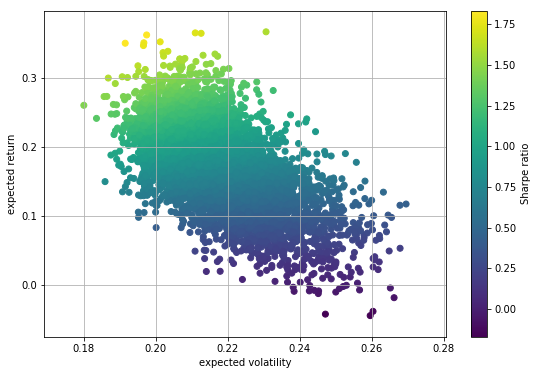

In [22]:
# draw a scatter picture to find the point with highest sharp ratio
plt.figure(figsize=(9,6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns/portfolio_volatilities, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [23]:
# use a function, when you input weights, the rate of return, votalities and sharpe ratio will be the output
def calculations(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean()*weights)*252
    pvol = np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [24]:
# return minus sharpe ratio
def min_func_sharpe(weights):
    return -calculations(weights)[2]

In [25]:
bnds = tuple((0,1) for x in range(number_of_assets))# boundary condition:every weight needs to be in(0,1)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # constraints
number_of_assets * [1. / number_of_assets,]  # input initial weights for 24 stocks

[0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664]

In [28]:
# use package to apply minimization optimization algorithm 
opts = sco.minimize(min_func_sharpe, 
                    (number_of_assets * [1. / number_of_assets,]), 
                    method='SLSQP', bounds=bnds, constraints=cons)

In [29]:
opts['x'].round(3) # weight distribution under the largest sharp ratio


array([0.   , 0.249, 0.   , 0.   , 0.   , 0.   , 0.   , 0.12 , 0.048,
       0.   , 0.018, 0.321, 0.   , 0.223, 0.   , 0.   , 0.   , 0.   ,
       0.022, 0.   , 0.   , 0.   , 0.   , 0.   ])

In [30]:
calculations(opts['x'].round(3)) # get rate of return, votality and sharpe ratio

array([0.70721847, 0.1940269 , 3.64495058])

In [31]:
# minimum variance portfolio
def min_func_variance(weights):
    return calculations(weights)[1]**2

In [32]:
optv = sco.minimize(min_func_variance, number_of_assets * [1. / number_of_assets,], method= 'SLSQP',bounds=bnds,constraints=cons)

In [ ]:
# To calculate efficient frontier, set of optimal portfolios that have the lowest risk for a given level of expected return.
def min_func_port(weights):   # to get volatility 
    return calculations(weights)[1] 

target_returns = np.linspace(0.0,0.3,4900) # set rate of return 
target_volatilities = []
bnds = tuple((0,1) for x in range(number_of_assets))
# in order to minimize the target volatility
for tret in target_returns:
    cons = ({'type': 'eq', 'fun': lambda x: calculations(x)[0] - tret}, 
            {'type':'eq','fun':lambda x: np.sum(x)-1})
    res = sco.minimize(min_func_port, number_of_assets * [1. / number_of_assets,], method='SLSQP', bounds=bnds, constraints=cons)
    target_volatilities.append(res['fun'])

In [ ]:
target_returns = np.linspace(0.0,0.3,4900)

# to draw a pricture gathered all the portfolio sets together
plt.figure(figsize=(8,5))
plt.scatter(target_volatilities, target_returns, 
            c=portfolio_returns / portfolio_volatilities, 
            marker = 'x') 
plt.scatter(portfolio_volatilities, 
            portfolio_returns, 
            c=portfolio_returns / portfolio_volatilities, 
            marker = 'o') #random portfolio
plt.plot(calculations(opts['x'])[1], calculations(opts['x'])[0], 'r*', markersize=15.0)
plt.plot(calculations(optv['x'])[1], calculations(optv['x'])[0], 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')